# Explore Municipality Dataset

This notebook is used to explore the `rivm-covid-19-municipality.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/rivm-covid-19-municipality.csv")

In [3]:
df["PositiefGetest"] = df["PositiefGetest"].astype(int)
df["Gemeentecode"] = df["Gemeentecode"].astype(int)
df["Provinciecode"] = df["Provinciecode"].astype(int)
df["Datum"] = pd.to_datetime(df["Datum"])

In [4]:
df.loc[df["Gemeentecode"] == -1, "Gemeente"] = "Onbekend"
df.loc[df["Provinciecode"] == -1, "Provincie"] = "Onbekend"

## Inspect dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21675 entries, 0 to 21674
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gemeentecode    21675 non-null  int64         
 1   PositiefGetest  21675 non-null  int64         
 2   Gemeente        21675 non-null  object        
 3   Provinciecode   21675 non-null  int64         
 4   Provincie       21675 non-null  object        
 5   Datum           21675 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1016.1+ KB


In [6]:
df.head()

,Gemeentecode,PositiefGetest,Gemeente,Provinciecode,Provincie,Datum
0,855,1,Tilburg,30,Noord-Brabant,2020-02-27
1,384,1,Diemen,27,Noord-Holland,2020-02-28
2,855,1,Tilburg,30,Noord-Brabant,2020-02-28
3,384,3,Diemen,27,Noord-Holland,2020-02-29
4,503,1,Delft,28,Zuid-Holland,2020-02-29


In [7]:
df.tail()

,Gemeentecode,PositiefGetest,Gemeente,Provinciecode,Provincie,Datum
21670,1963,289,Hoeksche Waard,28,Zuid-Holland,2020-05-13
21671,1966,29,Het Hogeland,20,Groningen,2020-05-13
21672,1969,57,Westerkwartier,20,Groningen,2020-05-13
21673,1970,25,Noardeast-Fryslân,21,Friesland,2020-05-13
21674,1978,110,Molenlanden,28,Zuid-Holland,2020-05-13


## Visualize top 10 (per day)

In [8]:
df_top = df.pivot(index="Datum", columns="Gemeente", values="PositiefGetest")
df_top = df_top[df_top.sum(axis=0).sort_values(ascending=False).head(10).index]

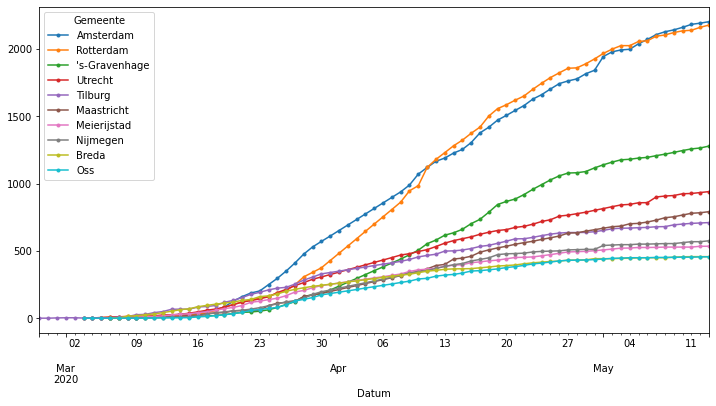

In [9]:
df_top.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize lowest 10 (per day)

In [10]:
df_lowest = df.pivot(index="Datum", columns="Gemeente", values="PositiefGetest")
df_lowest = df_lowest[df_lowest.sum(axis=0).sort_values(ascending=True).head(10).index]

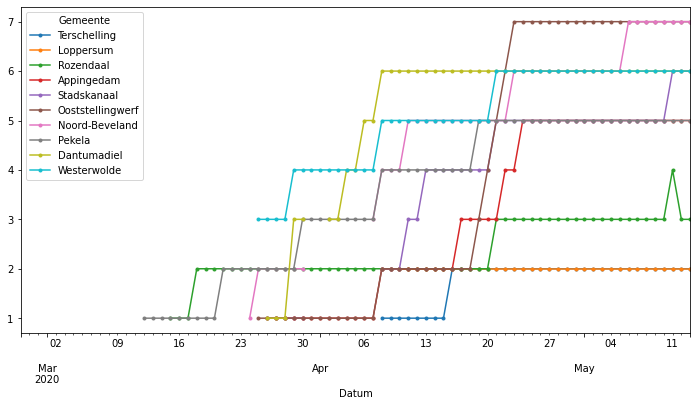

In [11]:
df_lowest.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize provinces (per day)

In [12]:
df_provinces = df.groupby(["Provinciecode", "Datum"], as_index=False).agg({
    "PositiefGetest": "sum",
    "Provincie": "first",
})
df_provinces = df_provinces.pivot(index="Datum", columns="Provincie", values="PositiefGetest")

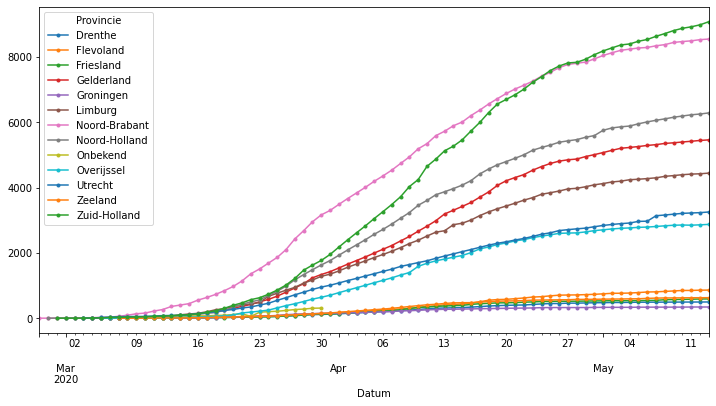

In [13]:
df_provinces.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize provinces (total)

In [14]:
df_provinces = df.groupby(["Provinciecode"], as_index=False).agg({
    "PositiefGetest": "sum",
    "Provincie": "first",
})

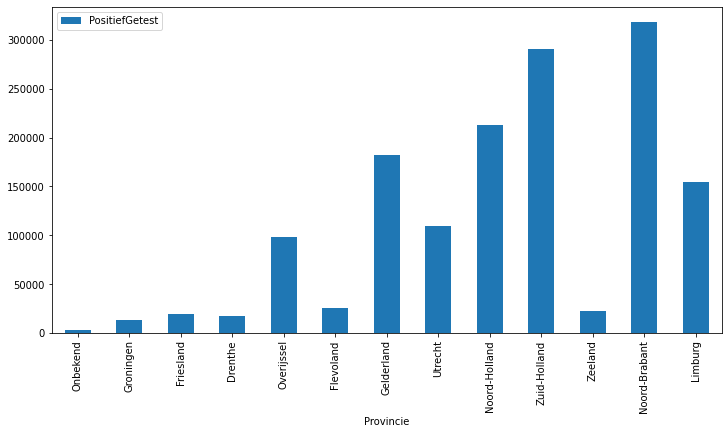

In [15]:
df_provinces.plot(
    x="Provincie",
    y=["PositiefGetest"],
    kind="bar",
    figsize=(12,6),
    style=".-",
)